In [1]:
from fitburst.pipelines.make_input_file import make_input
from fitburst.pipelines.run_fitburst import run_fitburst
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from baseband_analysis.core import BBData
import os
import gc
from chime_frb_api import frb_master
import datetime as dt
import numpy as np
import glob
from IPython.display import clear_output
from baseband_analysis.core.signal import tiedbeam_baseband_to_power

gc.collect()

cannot import name '_accel' from partially initialized module 'baseband_analysis.core' (most likely due to a circular import) (/data/user-data/ksand/baseband-analysis/baseband_analysis/core/__init__.py)


ImportError: cannot import name 'get_profile' from 'baseband_analysis.core.signal' (/data/user-data/ksand/baseband-analysis/baseband_analysis/core/signal.py)

In [5]:
import sys
print(sys.path)

['/data/user-data/ksand/baseband-analysis/playground', '/data/user-data/ksand/baseband-analysis', '/usr/local/lib/python38.zip', '/usr/local/lib/python3.8', '/usr/local/lib/python3.8/lib-dynload', '', '/opt/pysetup/.venv/lib/python3.8/site-packages', '/opt/pysetup']


In [5]:
##### Get singlebeam file path ######
from chime_frb_api import frb_master
import datetime as dt
frb_master_base_url = "http://frb-vsop.chime:8001"
master = frb_master.FRBMaster(base_url = frb_master_base_url)

event_id =  69841193

r = master.events.get_event(event_number=int(event_id))

burst_time_str = r['measured_parameters'][0]['datetime'][0:19]
burst_time = dt.datetime.strptime(burst_time_str, "%Y-%m-%d %H:%M:%S")
print(burst_time)

year = burst_time.strftime("%Y")
month = burst_time.strftime("%m")
day = burst_time.strftime("%d")

file = '/data/chime/baseband/processed/{}/{}/{}/astro_{}/singlebeam_{}.h5'.format(year, month, day, event_id, event_id)
#gc.collect()
print(file)

[2023-01-30 20:46:42,502] WARNING The FRB_MASTER_ACCESS_TOKEN environment variable will be deprecated in future versions. Rename to CHIME_FRB_ACCESS_TOKEN instead.
[2023-01-30 20:46:42,503] WARNING The FRB_MASTER_REFRESH_TOKEN environment variable will be deprecated in future versions. Rename to CHIME_FRB_REFRESH_TOKEN instead.
[2023-01-30 20:46:42,504] INFO Authorization Status: None
[2023-01-30 20:46:42,505] INFO Authorization Method: Tokens
[2023-01-30 20:46:43,844] INFO Authorization Token : Expired
[2023-01-30 20:46:43,845] INFO Reauthorize Method: Tokens
[2023-01-30 20:46:46,397] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2023-01-30 20:46:46,399] INFO Reauthorize Result: Passed


2020-01-22 10:20:32
/data/chime/baseband/processed/2020/01/22/astro_69841193/singlebeam_69841193.h5


In [3]:
###### Loading singlebeam file. You can change the input file here. #####
print("Loading singelebeam file {}".format(file))
data = BBData.from_file(file)
print("File loaded")
f = os.path.splitext(os.path.basename(file))
s = '_'.join(f[0].split('_')[1:])

Loading singelebeam file /data/chime/baseband/processed/2020/01/22/astro_69841193/singlebeam_69841193.h5
File loaded


In [14]:
dsamp = 8
# DM = 348.732
fit_file = str("R4_"+str(s)+"_dsamp_"+str(dsamp))

Since the DM was already provided get_snr() will run with DM Range as None
While running the first get_snr it will use the DM range as None
Data is not de-smeared, will not perform coherent-dedispersion
Running the first get_snr() at DM  103.5


/data/user-data/ksand/baseband-analysis/baseband_analysis/core/signal.py:119: RuntimeWarning: Mean of empty slice
  if not np.isnan(np.nanmean(power_in[-1], axis=0)).any():
[2023-01-22 05:33:05,164] INFO Applying LTE mask


In the start (988, 125075)
Apply lte mask (988, 125075)
After time range (988, 125075)
Time range (988, 51733)
Inside get weight
After weights (988, 51733)
After downsample (988, 6466)


/data/user-data/ksand/baseband-analysis/baseband_analysis/core/flagging.py:93: RuntimeWarning: Mean of empty slice
  spect = get_spect(np.nanmean(power_beam, axis=-1), thres=thres_mean)
/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


After RFI clean (988, 6466)
After refine RFI (988, 6466)
Before removing invalid channels (988, 6466)
At the end (866, 6466)


[2023-01-22 05:33:13,590] INFO Applying LTE mask


In the start (988, 125075)
Apply lte mask (988, 125075)
After time range (988, 125075)
Time range (988, 51733)
Inside get weight
After weights (988, 51733)
After downsample (988, 6466)
After RFI clean (988, 6466)
After refine RFI (988, 6466)
After doublecheck_RFI (988, 6466)
Before removing invalid channels (988, 6466)
At the end (866, 6466)
(866, 6466)
Frequencies minimum and maximum 400.78125 799.609375
Valid channels size 988
Frequency size: 866
Frequency id size: minimum and maximum freq id 866 1 1022
From now on the DM_range for get_snr() will be None
DM value before extracting burst at structure maximising 103.5 0 103.5


[2023-01-22 05:33:22,367] INFO Applying LTE mask


In the start (988, 125075)
Apply lte mask (988, 125075)
After time range (988, 125075)
Time range (988, 51733)
Inside get weight
After weights (988, 51733)
After downsample (988, 6466)
After refine RFI (988, 6466)
Before removing invalid channels (988, 6466)
At the end (913, 6466)


[2023-01-22 05:33:30,368] INFO Applying LTE mask


In the start (988, 125075)
Apply lte mask (988, 125075)
After time range (988, 125075)
Time range (988, 51733)
Inside get weight
After weights (988, 51733)
After downsample (988, 6466)
After refine RFI (988, 6466)
After doublecheck_RFI (988, 6466)
Before removing invalid channels (988, 6466)
At the end (868, 6466)


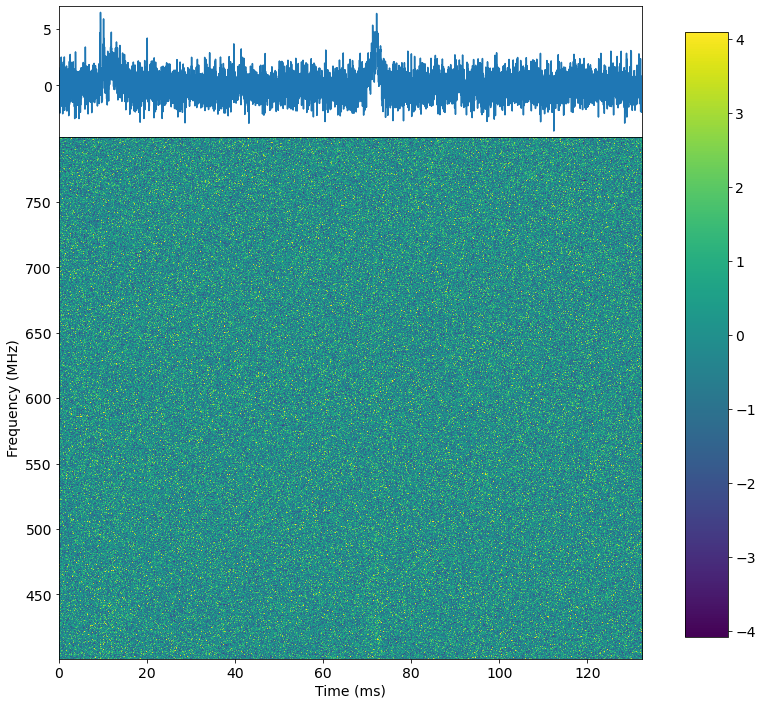

DM value after extracting burst at structure maximising is 103.5 0 103.5
DM value used from now on in downsample 2 is 103.5


<Figure size 432x288 with 0 Axes>

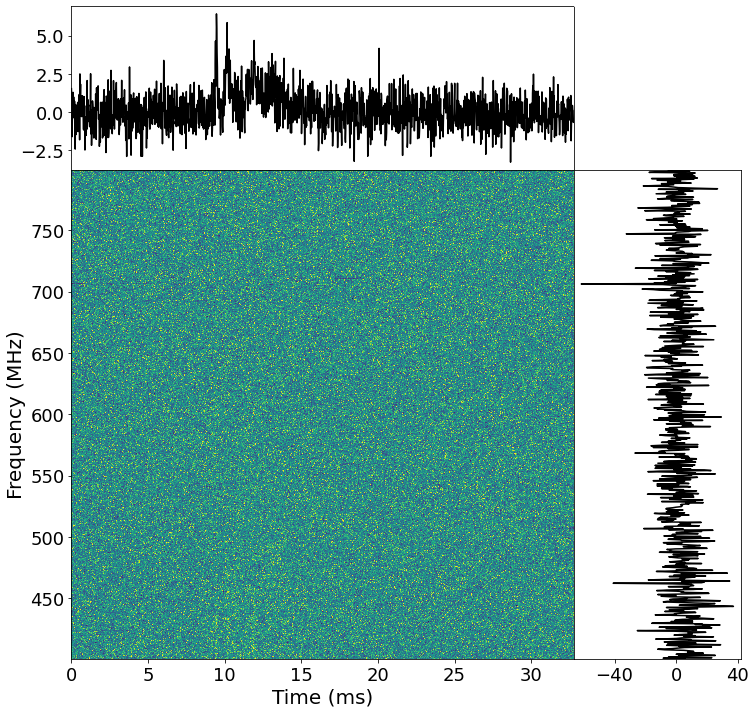

<Figure size 432x288 with 0 Axes>

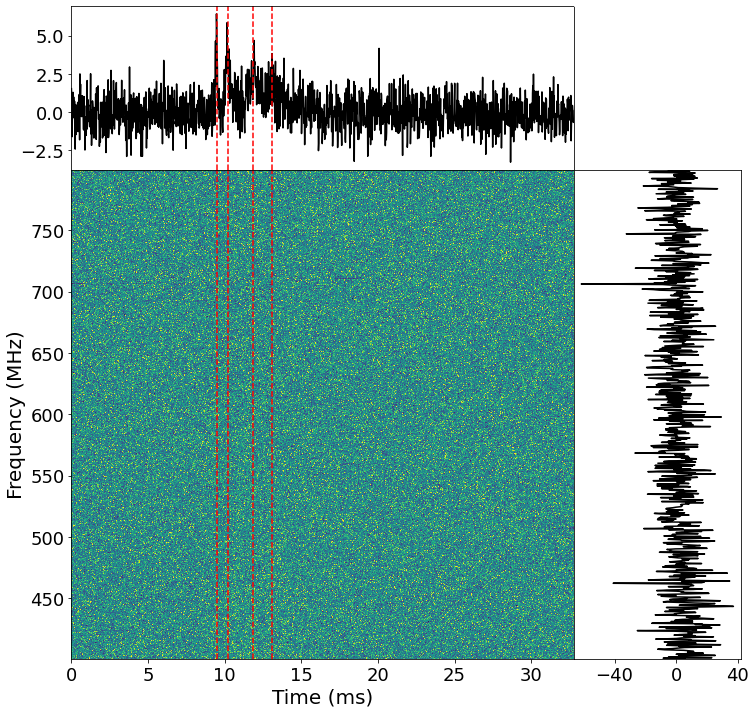

Starting MCMC fit
3  {}
[0.00950272 0.01021952 0.01185792 0.0131072 ]
[0.00914432 0.00940032 0.01123328 0.00328704]
[0.00914432 0.00950272 0.01123328 0.01185792]
[0, 0.009144320000000001, 0, 0, 0.009502720000000001, 0, 0, 0.011233280000000002, 0, 0, 0.011857920000000001, 0, 0] [0.00039537817382812507, 0.009502720000000001, 6.144000000000001e-05, 0.00039537817382812507, 0.010219520000000001, 6.144000000000001e-05, 0.00039537817382812507, 0.011857920000000001, 6.144000000000001e-05, 0.00039537817382812507, 0.0131072, 6.144000000000001e-05, 0.00012288000000000002] [inf, 0.009502720000000001, inf, inf, 0.010219520000000001, inf, inf, 0.011857920000000001, inf, inf, 0.0131072, inf, inf]


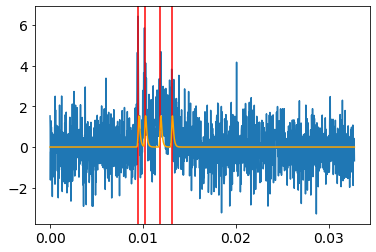

/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:214: RuntimeWarning: overflow encountered in exp
  I = lam/2*np.exp(lam/2*(2*mu + lam*sigma**2 - 2*x))
/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:214: RuntimeWarning: overflow encountered in multiply
  I = lam/2*np.exp(lam/2*(2*mu + lam*sigma**2 - 2*x))
/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:216: RuntimeWarning: invalid value encountered in multiply
  return I * II


Curve_fit params: [7.20332567e-04 9.43573748e-03 5.12130088e-05 1.34147024e-03
 1.01742949e-02 1.68466889e-04 1.75278362e-03 1.17887543e-02
 3.38791653e-04 2.49218101e-03 1.31071981e-02 6.55605994e-04
 2.92277527e-05]
MEAN [0.00943574 0.01017429 0.01178875 0.0131072 ]
Reduced Chi Squared for Event 69841193 is 1.053


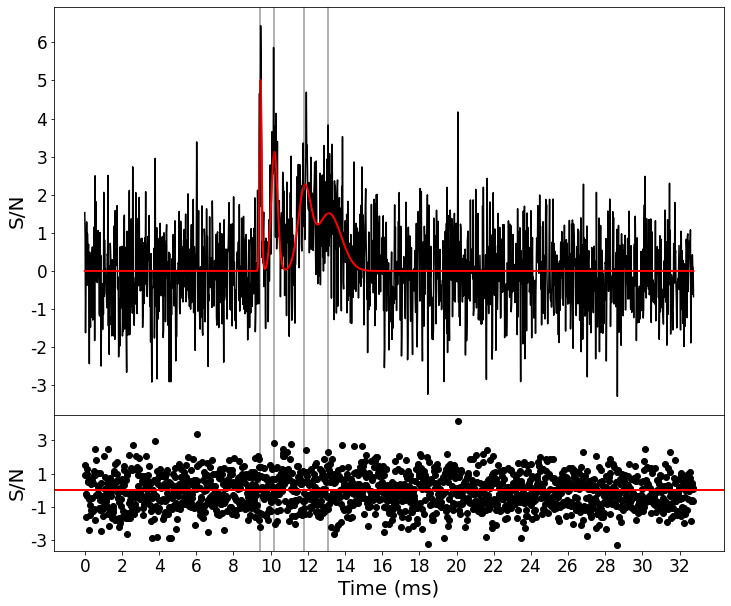

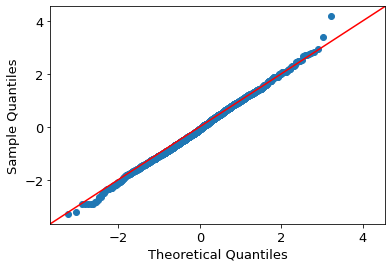

  0%|                                                                                                                               | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:214: RuntimeWarning: overflow encountered in multiply
  I = lam/2*np.exp(lam/2*(2*mu + lam*sigma**2 - 2*x))
/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:216: RuntimeWarning: invalid value encountered in multiply
  return I * II
/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:214: RuntimeWarning: overflow encountered in multiply
  I = lam/2*np.exp(lam/2*(2*mu + lam*sigma**2 - 2*x))
/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:216: RuntimeWarning: invalid value encountered in multiply
  return I * II
/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:214: RuntimeWarning: overflow encountered in multiply
  I = lam/2*np.exp(lam/2*(2*mu + lam*sigma**2 - 2*x))
/usr/local/lib/python3.7/sit

The chain is shorter than 50 times the integrated autocorrelation time for 13 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [206.18514484 244.78159458 243.7731349  528.76785383 354.9294153
 481.88019218 869.71308187 750.59637915 867.6938137  799.44634346
 820.05090042 595.71194311 277.8527635 ]
Discarded 1000 and thinned by 250


[2023-01-22 05:35:23,740] WARNING Too few points to create valid contours


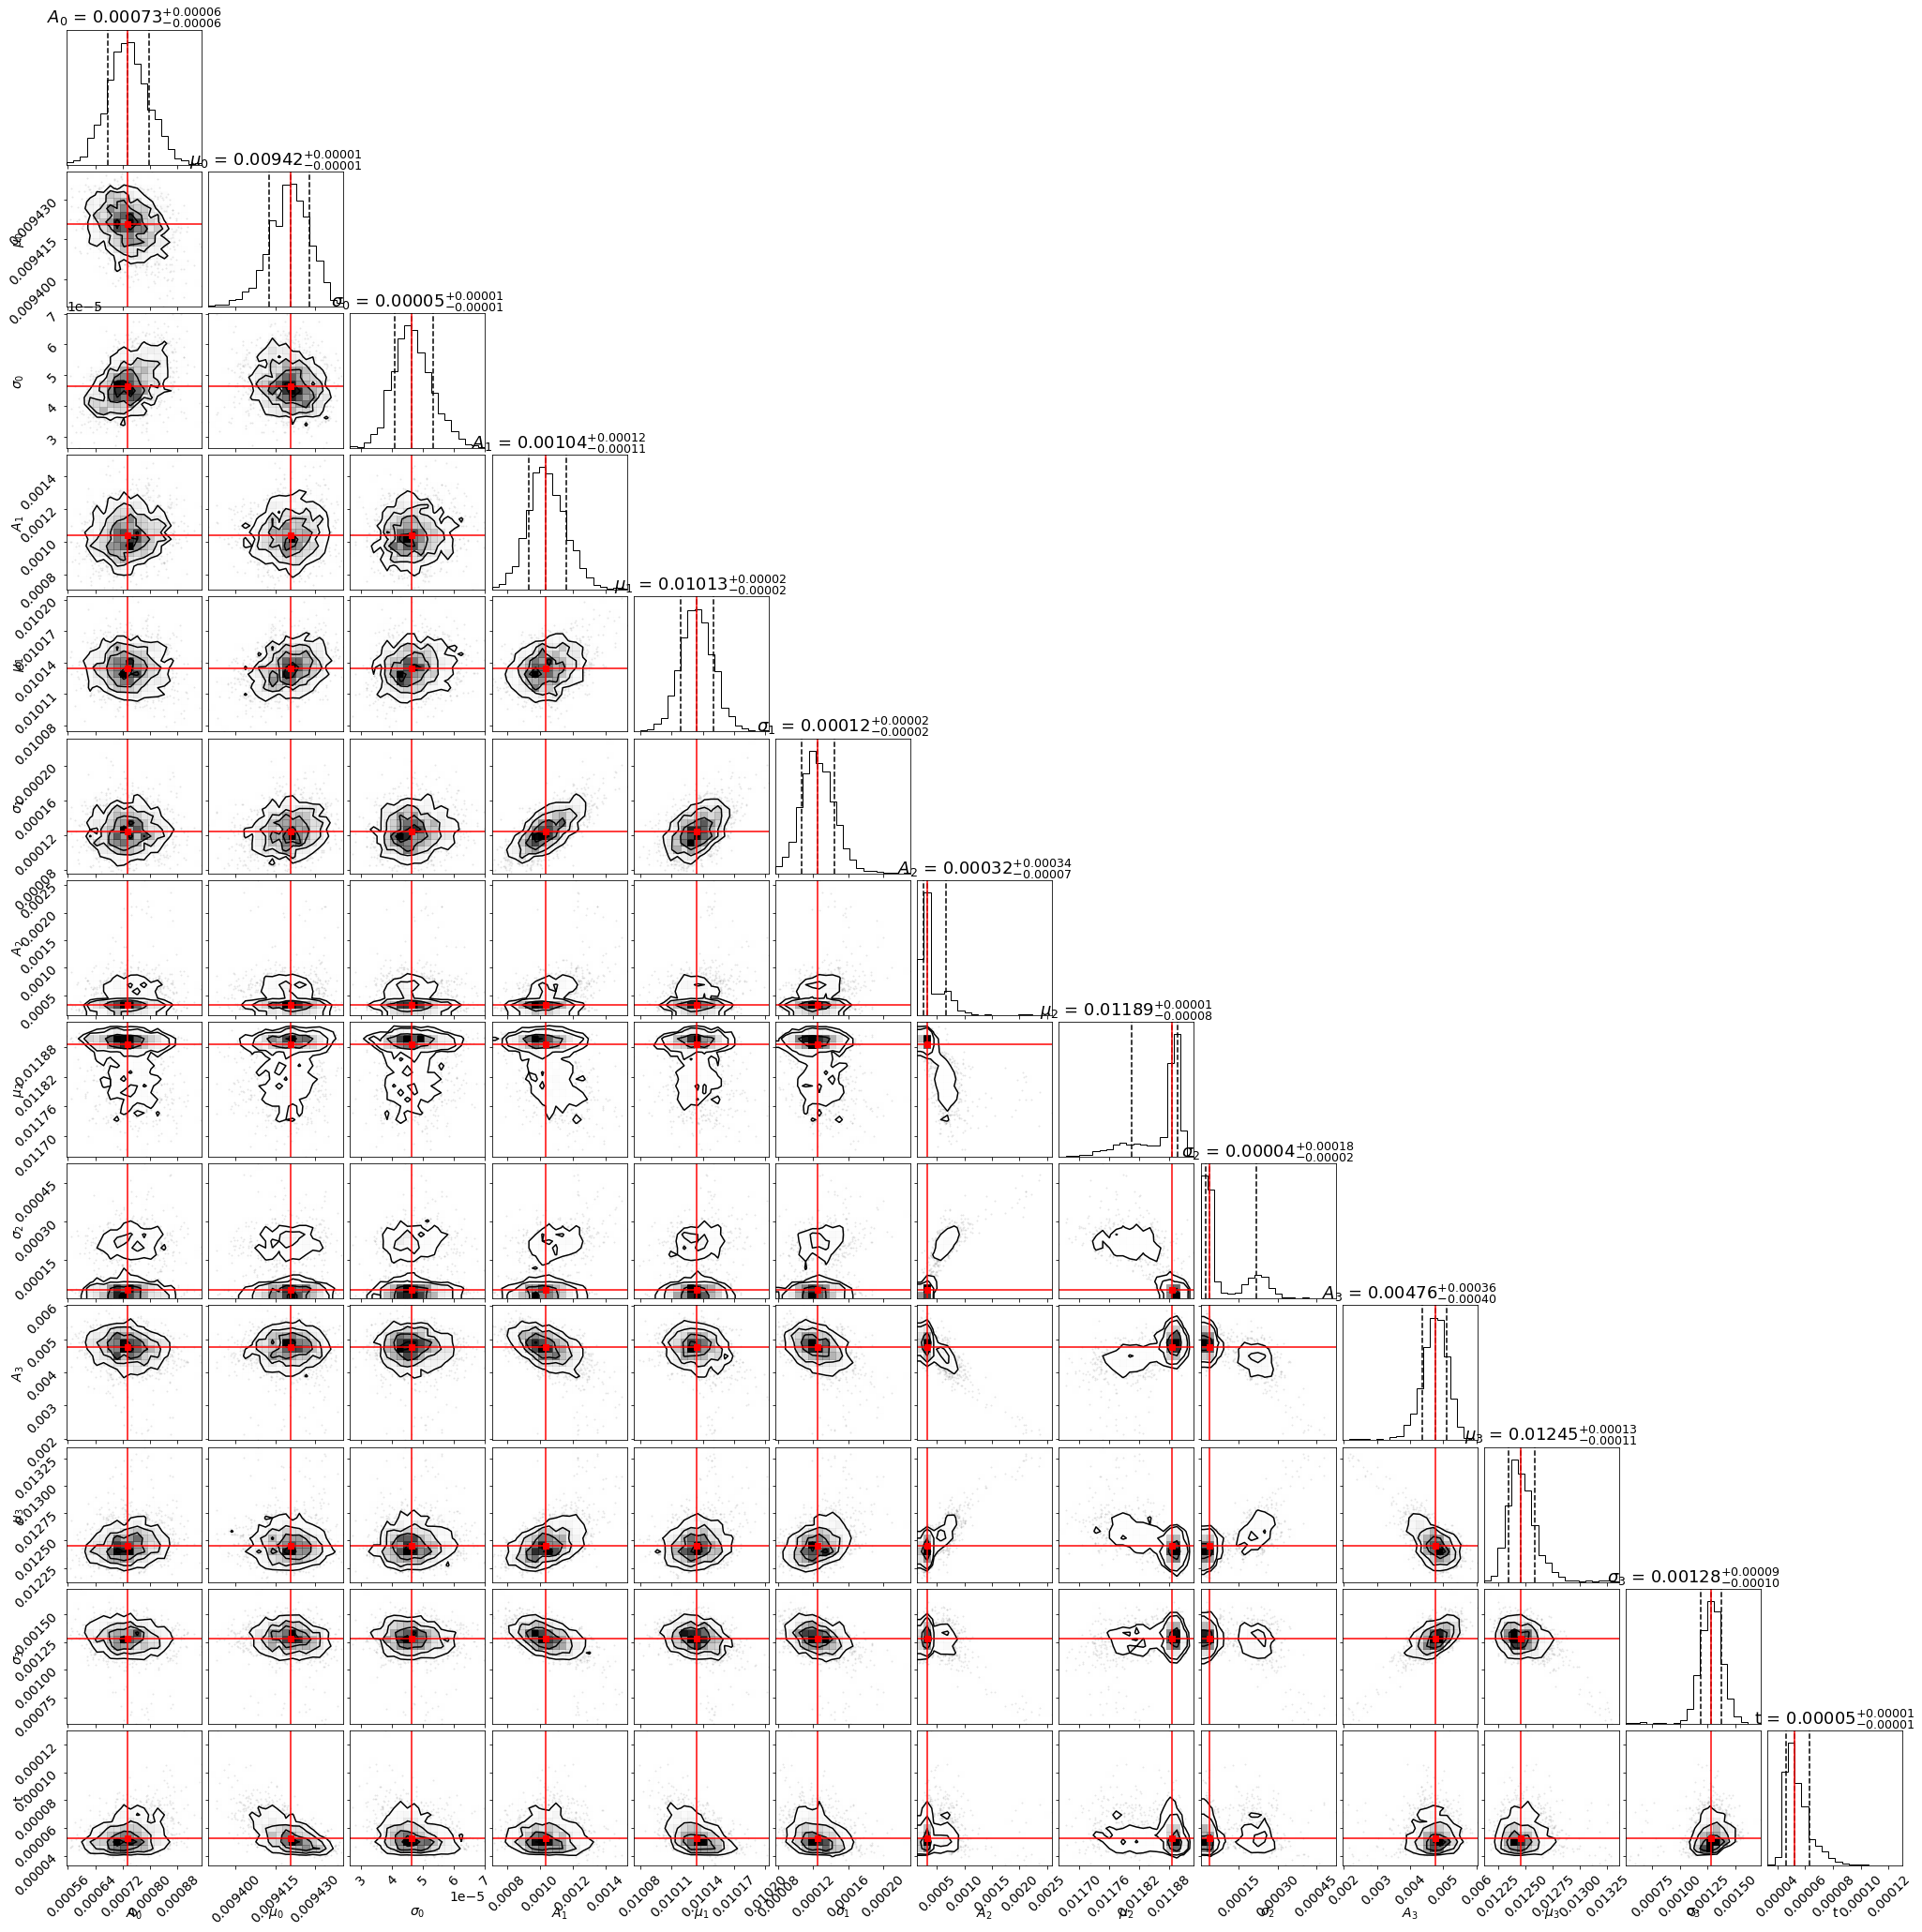

MEAN [0.00942064 0.01013418 0.01188604 0.0124542 ]
Reduced Chi Squared for Event 69841193 is 1.049


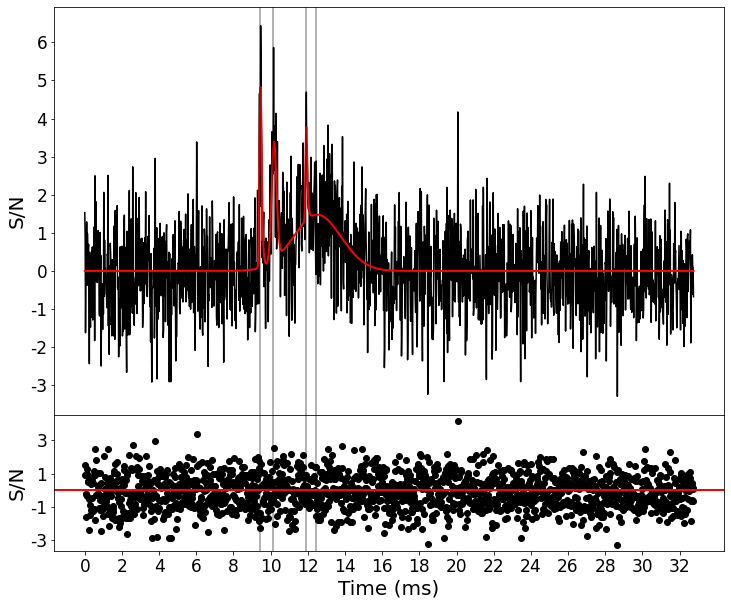

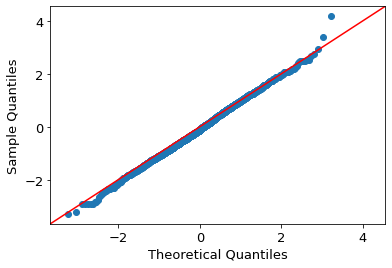

Profile parameters are [7.34789272e-04 9.42063517e-03 4.64463291e-05 1.03714822e-03
 1.01341832e-02 1.24359000e-04 3.18206801e-04 1.18860391e-02
 3.54369114e-05 4.75751737e-03 1.24541995e-02 1.28439118e-03
 5.22373232e-05]
The number of peaks provided/found are 4, the best fit occurs with 1 peaks
Spectrum parameters [array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.])]
Bandwidth is  398.828125
DM error is  0.025


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
make_input(file, # location of h5 file
           nwalkers=50, # number of walkers for MCMC
           nchain=10000, # length of MCMC chains
           downsample = dsamp, # downsampling factor for peak_finding step
           fit_DM = False,
           downsample2 = None,
           fit_spectrum = False,
           DM = 103.5,
           spectrum_lim = False,
           #fill_missing_time = True,
           time_range = [0,1600],
           peaks = [464, 499, 579, 640],
           save = 'pm_R4_dsamp_'+str(dsamp)+'_', # Prefix for saving MCMC results
           diagnostic_plots=True, 
           output = fit_file #prefix for fitburst npz input file
          )

In [17]:
npz_file = str(fit_file)+".npz"
run_fitburst(npz_file, './')

[2023-01-22 05:36:16,582] INFO Initializing model...


Printing frequencies in run fitburst None
Printing good frequencies [0. 1. 1. ... 1. 1. 0.]
Printing frequencies again [400.9765625 401.3671875 401.7578125 ... 799.8046875 800.1953125
 800.5859375]
INFO: input data cube is already dedispersed!
INFO: setting 'dm' entry to 0, now considered a dm-offset parameter...
INFO: computing dedispersion-index matrix
INFO: dimensions of model spectrum set to (1024, 1600)


/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:69: RuntimeWarning: overflow encountered in multiply
  profile = amp_term * exp_term_1 * exp_term_2 * erf_term
/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:69: RuntimeWarning: invalid value encountered in multiply
  profile = amp_term * exp_term_1 * exp_term_2 * erf_term
/usr/local/lib/python3.7/site-packages/fitburst/routines/profile.py:67: RuntimeWarning: overflow encountered in exp
  exp_term_2 = np.exp(-(times - toa) / sc_time)


fixing dm-offset
INFO: removing the following parameters: dm_index, scattering_index, dm
INFO: new list of fit parameters: scattering_timescale, amplitude, arrival_time, burst_width, spectral_index, spectral_running
ERROR: solver encountered a failure! Debug!
Residuals are not finite in the initial point.
ERROR: could not compute uncertainties!
local variable 'results' referenced before assignment


AttributeError: 'LSFitter' object has no attribute 'bestfit_results'